In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import plot_tree

# Q1 / Q2
### Data Source
### Data Quality Analysis (DQA)

In [3]:
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

In [4]:
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [5]:
print(df.dtypes)

hours_per_week_bin    object
occupation_bin        object
msr_bin               object
capital_gl_bin        object
race_sex_bin          object
education_num_bin     object
education_bin         object
workclass_bin         object
age_bin               object
flag                  object
y                      int64
dtype: object


In [6]:
## check for missing values
print(df.isnull().sum())

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64


In [7]:
#create mapping for columns to check for correlation
df['hours_per_week_bin2'] = df['hours_per_week_bin'].map({"a. 0-30":0,"b. 31-40":1,"d. 41-50 & 61-70":2,"e. 51-60":3,"c. 71-100":4})
df['occupation_bin2'] = df['occupation_bin'].map({'a. Low':0,'b. Mid - Low':1,'c. Mid - Mid':2,'d. Mid - High':3,'e. High':4})
df['msr_bin2'] = df['msr_bin'].map({'a. Low':0,'b. Mid':1,'c. High':2})
df['capital_gl_bin2'] = df['capital_gl_bin'].map({'a. = 0':0,'b. < 0':1,'c. > 0':2})
df['race_sex_bin2'] = df['race_sex_bin'].map({'a. Low':0,'b. Mid':1,'c. High':2})
df['education_num_bin2'] = df['education_num_bin'].map({'a. 0-8':0,'b. 9-12':1,'c. 13':2,'d. 14':3,'e. 15+':4})
df['education_bin2'] = df['education_bin'].map({'a. Low':0,'b. Mid':1,'c. Bachelors':2,'d. Masters':3,'e. High':4})
df['workclass_bin2'] = df['workclass_bin'].map({'a. no income':0,'b. income':1})
df['age_bin2'] = df['age_bin'].map({'a. 0-25':0,'b. 26-30 & 71-100':1,'c. 31-35 & 61-70':2,'d. 36-40 & 56-60': 3,'e. 40-55':4})

In [8]:
#check the significance of the variables on y based on chi2
x=df.loc[:,["hours_per_week_bin2","occupation_bin2","msr_bin2","capital_gl_bin2","race_sex_bin2", "education_num_bin2", "education_bin2", "workclass_bin2", "age_bin2"]]  #Independent variable
y=df.loc[:,["y"]]   #Target variable
f_score=chi2(x,y)   #returns f score and p value 
f_score
p_value=pd.Series(f_score[1],index=x.columns)
p_value.sort_values(ascending=True,inplace=True)
p_value
#all columns are significant and should be included in analysis

hours_per_week_bin2     0.000000e+00
occupation_bin2         0.000000e+00
msr_bin2                0.000000e+00
capital_gl_bin2         0.000000e+00
education_num_bin2      0.000000e+00
education_bin2          0.000000e+00
age_bin2                0.000000e+00
race_sex_bin2          2.557425e-122
workclass_bin2          7.399321e-06
dtype: float64

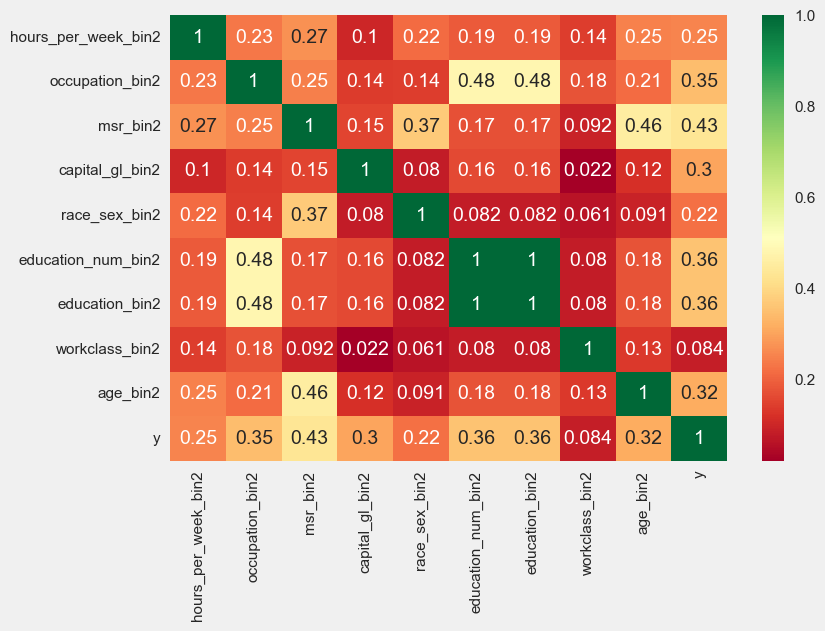

In [9]:
df2=df.loc[:,["hours_per_week_bin2","occupation_bin2","msr_bin2","capital_gl_bin2","race_sex_bin2", "education_num_bin2", "education_bin2", "workclass_bin2", "age_bin2", "flag", "y"]]  #Independent variable
sns.heatmap(df2.corr(), cmap='RdYlGn', annot=True)
plt.show()

In [119]:
#remove one of education_num_bin2 and education_bin2
#dfFinal = df2=df.loc[:,["hours_per_week_bin2","occupation_bin2","msr_bin2","capital_gl_bin2","race_sex_bin2", "education_bin2", "workclass_bin2", "age_bin2", "flag", "y"]

Q.1 Why does it makes sense to discretize columns for this problem?

it is important to discretize columns in this problem because the data would be a bit harder to interpret if there was such a wide range of values that are on different scales. Additionally, discretizing the columns allows us to make conclusions / group together similar features. 
    
Q.2 What might be the issues (if any) if we DID NOT discretize the columns.

if we did not discretize columns there could be issues that arise with outliers not being handled / effecting data quality and the patterns might not get captured as accurately.

# Q3
### Build Decision Tree Classifier Models

In [23]:
split=['flag'].unique()
print(split)

['train' 'test']


In [29]:
for value in split:
    train_data=df[df['flag']=='train']
    test_data=df[df['flag']=='test']

In [34]:
x_train = pd.get_dummies(train_data[['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin','age_bin' ]])
y_train = train_data["y"]

In [35]:
x_test = pd.get_dummies(test_data[['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin','age_bin' ]])
y_test = test_data["y"]

In [109]:
tree = DecisionTreeClassifier(max_depth=10, random_state=101, max_features= None,min_samples_leaf=15 )
tree.fit(x_train, y_train)
tree1Fit = tree.fit(x_train, y_train)


y_pred = tree.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8431914501566243


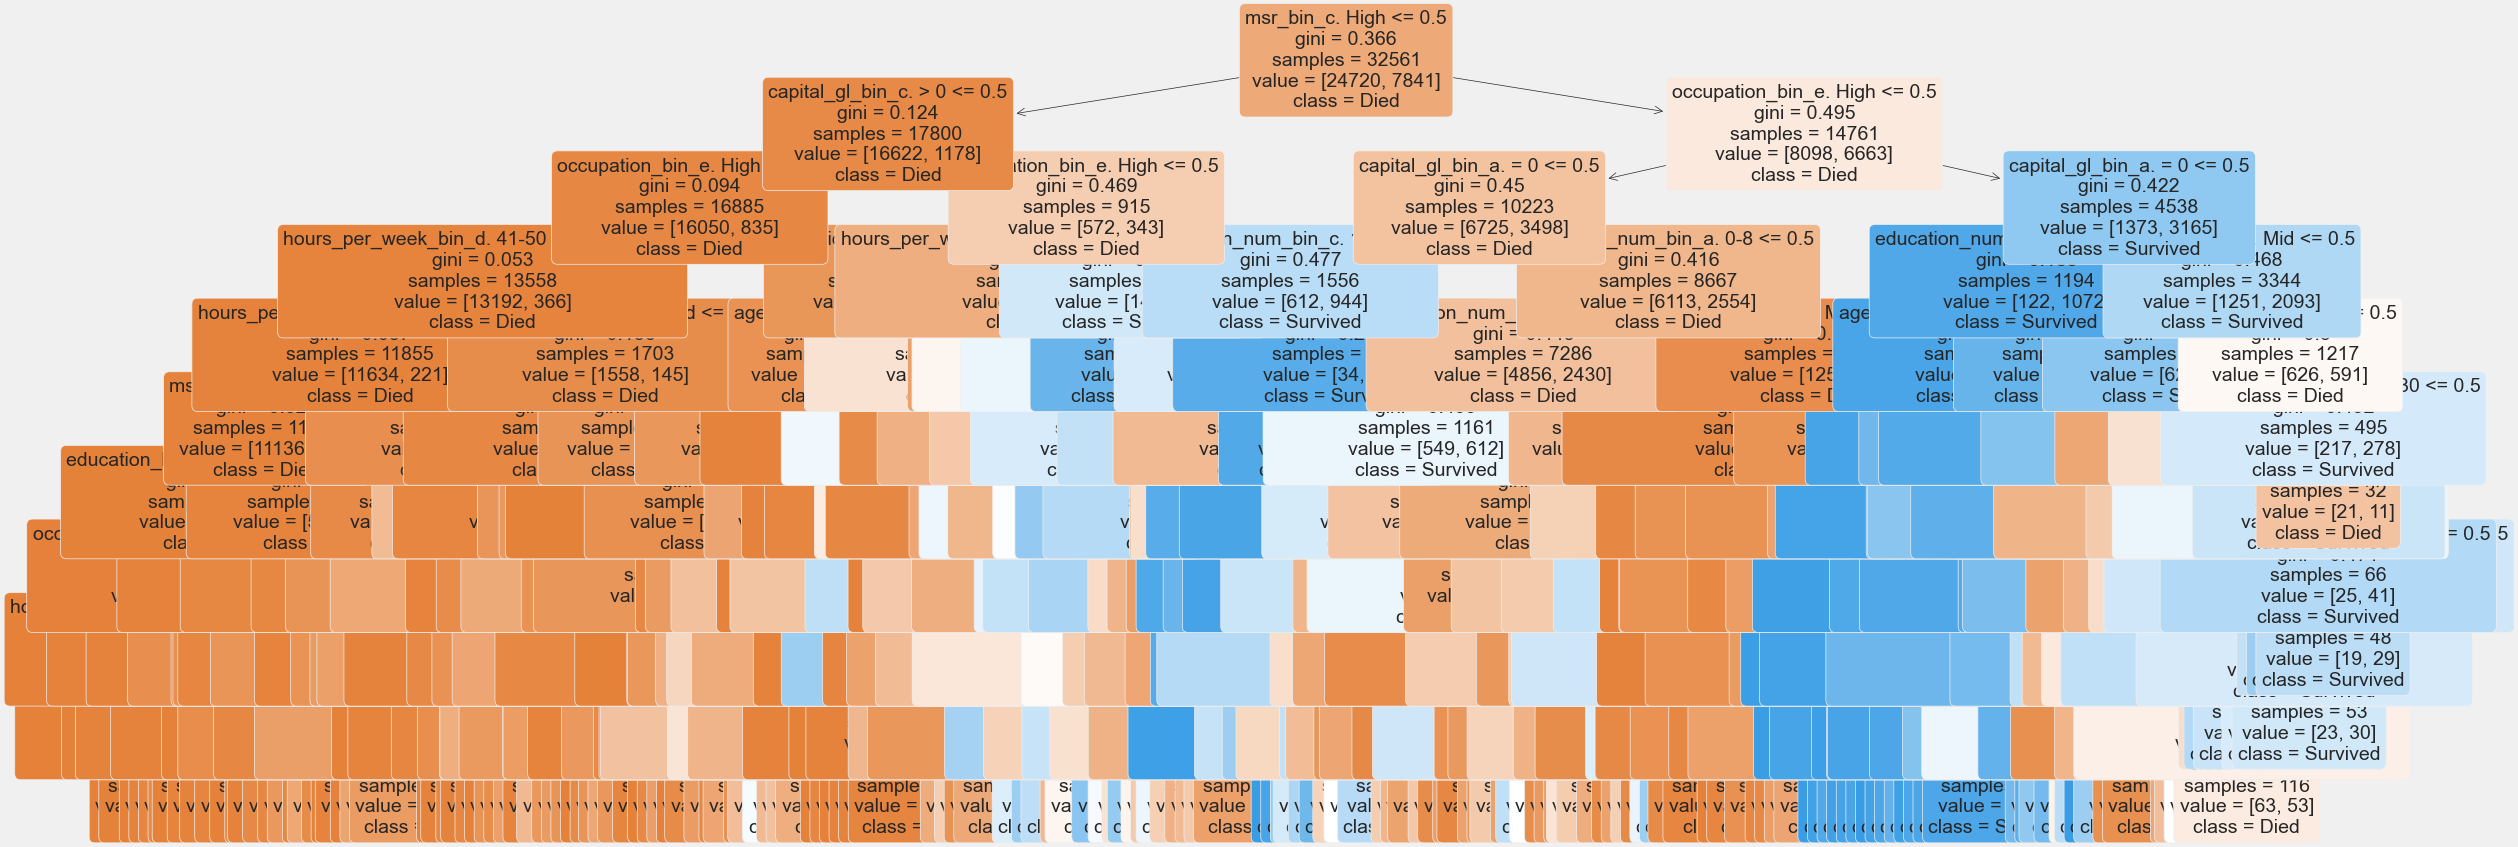

In [115]:
plt.figure(figsize=(25,10))
tree1 = plot_tree(tree1Fit, feature_names=list(x_train), class_names=['Died', 'Survived'], 
              filled=True, rounded=True, fontsize=14)

# Q4
### Evaluate Decision Tree Performance

In [46]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[11538   897]
 [ 1656  2190]]


In [52]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8366193722744303
Precision: 0.6919093851132686
Recall: 0.5559022360894436
F1 Score: 0.6164936562860438


# Q5
### Tune Decision Tree Performance

In [104]:
#criterion

Accuracyresults = []
criterion = ["entropy", "gini"]
for trees in criterion: 
    model = DecisionTreeClassifier(criterion=trees, random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    Accuracyresults.append(accuracy)


Precisionresults = []
for trees in criterion: 
    model = DecisionTreeClassifier(criterion=trees, random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    precision = precision_score(y_test, y_pred)
    Precisionresults.append(precision)


Recallresults = []
for trees in criterion:  
    model = DecisionTreeClassifier(criterion=trees, random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    recall = recall_score(y_test, y_pred)
    Recallresults.append(recall)

F1results = []
for trees in criterion:  
    model = DecisionTreeClassifier(criterion=trees, random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred)
    F1results.append(f1)


criterionDF = pd.DataFrame(data=zip(Accuracyresults,Precisionresults,Recallresults,F1results),columns=['Accuracy','Precision','Recall','F1'], index = criterion)

In [101]:
#max features

Accuracyresults = []
max_features = ['auto', None,.3,.4,.5,.6,.7,.8]
for trees in max_features: 
    model = DecisionTreeClassifier(max_features=trees, random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    Accuracyresults.append(accuracy)


Precisionresults = []
for trees in max_features: 
    model = DecisionTreeClassifier(max_features=trees, random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    precision = precision_score(y_test, y_pred)
    Precisionresults.append(precision)


Recallresults = []
for trees in max_features:  
    model = DecisionTreeClassifier(max_features=trees, random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    recall = recall_score(y_test, y_pred)
    Recallresults.append(recall)

F1results = []
for trees in max_features:  
    model = DecisionTreeClassifier(max_features=trees, random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred)
    F1results.append(f1)


maxFeatureDF = pd.DataFrame(data=zip(Accuracyresults,Precisionresults,Recallresults,F1results),columns=['Accuracy','Precision','Recall','F1'], index = max_features)

In [99]:
#min samples leaf

Accuracyresults = []
min_samples_leaf = [5,10,15,20,25,30,35,40]
for trees in min_samples_leaf: 
    model = DecisionTreeClassifier(min_samples_leaf=trees, random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    Accuracyresults.append(accuracy)


Precisionresults = []
for trees in min_samples_leaf: 
    model = DecisionTreeClassifier(min_samples_leaf=trees, random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    precision = precision_score(y_test, y_pred)
    Precisionresults.append(precision)


Recallresults = []
for trees in min_samples_leaf: 
    model = DecisionTreeClassifier(min_samples_leaf=trees, random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    recall = recall_score(y_test, y_pred)
    Recallresults.append(recall)

F1results = []
for trees in min_samples_leaf: 
    model = DecisionTreeClassifier(min_samples_leaf=trees, random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred)
    F1results.append(f1)


minleafDF = pd.DataFrame(data=zip(Accuracyresults,Precisionresults,Recallresults,F1results),columns=['Accuracy','Precision','Recall','F1'], index= min_samples_leaf)


In [97]:
#max depth
Accuracyresults = []
max_depth_options = [2,4,6,8,10,12,14,16]
for trees in max_depth_options: 
    model = DecisionTreeClassifier(max_depth=trees, random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    Accuracyresults.append(accuracy)


Precisionresults = []
for trees in max_depth_options: 
    model = DecisionTreeClassifier(max_depth=trees, random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    precision = precision_score(y_test, y_pred)
    Precisionresults.append(precision)


Recallresults = []
for trees in max_depth_options: 
    model = DecisionTreeClassifier(max_depth=trees, random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    recall = recall_score(y_test, y_pred)
    Recallresults.append(recall)

F1results = []
for trees in max_depth_options: 
    model = DecisionTreeClassifier(max_depth=trees, random_state = 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred)
    F1results.append(f1)


maxDepthDF = pd.DataFrame(data=zip(Accuracyresults,Precisionresults,Recallresults,F1results),columns=['Accuracy','Precision','Recall','F1'], index=max_depth_options)


Q.3 Decision Tree Hyper-parameter variation vs. performance

In [105]:
criterionDF

,Accuracy,Precision,Recall,F1
entropy,0.835575,0.688366,0.555382,0.614765
gini,0.836435,0.692233,0.553822,0.615340


In [102]:
maxFeatureDF

,Accuracy,Precision,Recall,F1
auto,0.834961,0.686996,0.553562,0.613103
None,0.836435,0.692233,0.553822,0.615340
0.3,0.836681,0.691513,0.557202,0.617135
0.4,0.835637,0.690182,0.552002,0.613407
0.5,0.836128,0.690862,0.554342,0.615118
0.6,0.836189,0.690100,0.556422,0.616093
0.7,0.836988,0.693005,0.556422,0.617248
0.8,0.836804,0.691712,0.557722,0.617533


In [103]:
minleafDF

,Accuracy,Precision,Recall,F1
5,0.838831,0.699282,0.557462,0.620370
10,0.839998,0.701789,0.561102,0.623609
15,0.841963,0.709582,0.560322,0.626180
20,0.844051,0.714755,0.565523,0.631441
25,0.843314,0.711532,0.566303,0.630665
30,0.842332,0.712670,0.557202,0.625420
35,0.843069,0.714096,0.559802,0.627605
40,0.842454,0.713287,0.556942,0.625493


In [98]:
maxDepthDF

,Accuracy,Precision,Recall,F1
2,0.816596,0.695455,0.397816,0.506120
4,0.827590,0.705417,0.463859,0.559686
6,0.839875,0.690440,0.583983,0.632765
8,0.841840,0.713757,0.551742,0.622379
10,0.841226,0.700350,0.573063,0.630345
12,0.838646,0.690053,0.575403,0.627534
14,0.838585,0.692478,0.569683,0.625107
16,0.836619,0.691909,0.555902,0.616494


# Q6
### Visualize Your Best Decision Tree using GraphViz

In [117]:
#best combination of parameters
treeBestPerformance = DecisionTreeClassifier(max_depth=8, random_state=101, max_features= .9,min_samples_leaf=20, criterion = "gini" )
treeBestPerformance.fit(x_train, y_train)
bestTree = treeBestPerformance.fit(x_train, y_train)


y_pred = treeBestPerformance.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8433142927338616
Precision: 0.717063359034529
Recall: 0.5561622464898596
F1 Score: 0.6264460389515303


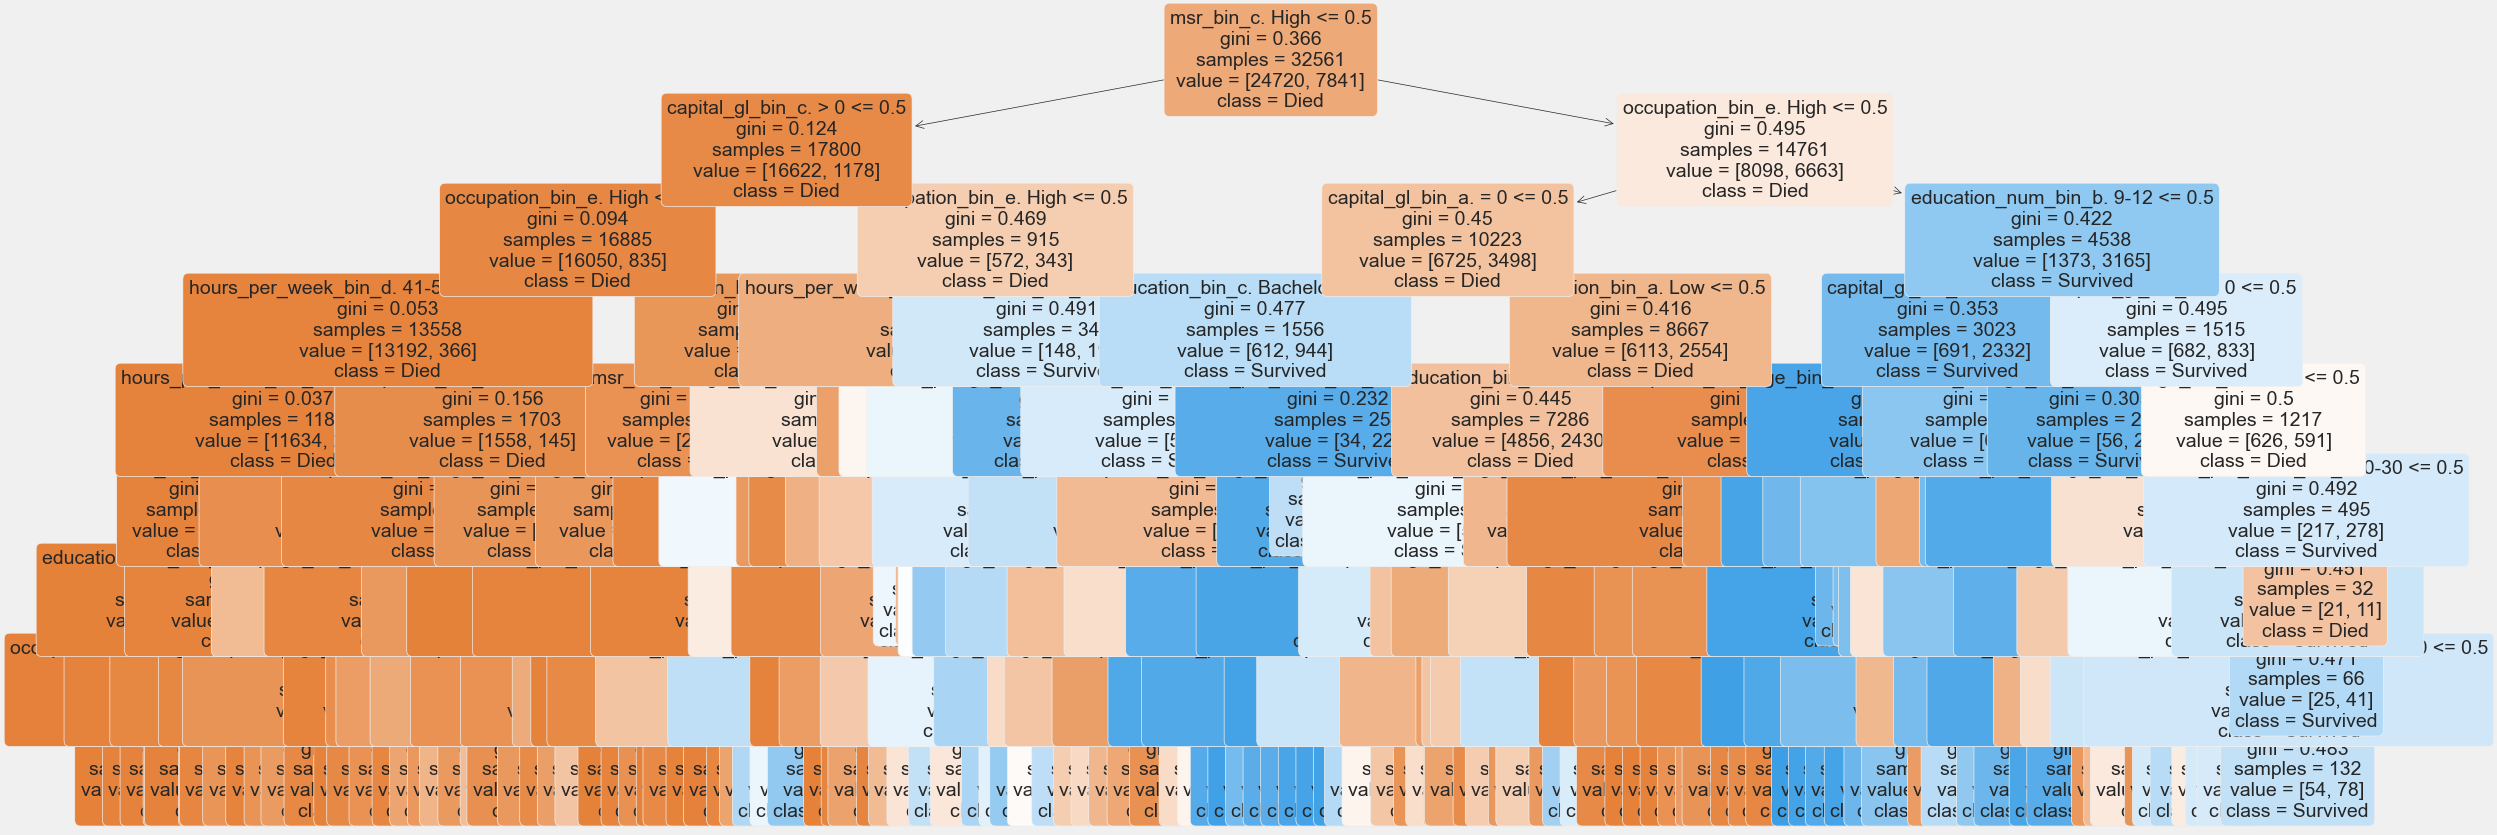

In [122]:
plt.figure(figsize=(25,10))
bestTreeGraph = plot_tree(bestTree, feature_names=list(x_train), class_names=['Died', 'Survived'], 
              filled=True, rounded=True, fontsize=14)

# Q7
### Conclusion

Q.4 How long was your total run time to train the best model?

Around 30 seconds for the best model

Q.5 Did you find the BEST TREE?

Yes this was the best tree based on the 4 measures (accuracy, precision, recall, and F1)

Q.6 Write your observations from the visualization of the best tree

It is pretty difficult to draw any observations or insight from this decision tree on the scale and screen size that I posses. 

Q.7 Will this Tree “overfit”? (Hint: Is this tree “fully grown”)

I think the tree is overfit because it is trying to accomodate and consider too many variables which has led to the large amoutns of leads and layers

# Q8
### Prediction using your “trained” Decision Tree Model

In [ ]:
#• Hours Worked per Week = 48
#• Occupation Category = Mid - Low
#• Marriage Status & Relationships = High
#• Capital Gain = Yes
#• Race-Sex Group = Mid
#• Number of Years of Education = 12
#• Education Category = High
#• Work Class = Income
#• Age=58

In [163]:
data = {'hours_per_week_bin':["d. 41-50 & 61-70"],
       'occupation_bin':['b. Mid - Low'],
       'msr_bin':['c. High'],
       'capital_gl_bin':['c. > 0'],
       'race_sex_bin':['b. Mid'],
       'education_num_bin':['b. 9-12'],
       'education_bin':['e. High'],
       'workclass_bin':['b. income'],
       'age_bin':['d. 36-40 & 56-60']}

newPerson = pd.DataFrame(data)
test_data_copy = test_data
test_data_copy = test_data_copy.append(newPerson)
test_data_copy

x_test2New = pd.get_dummies(test_data_copy[['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin','age_bin' ]])
newPersonDF = x_test2New.tail(1)
newPersonDF

,hours_per_week_bin_a. 0-30,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60,occupation_bin_a. Low,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,occupation_bin_e. High,...,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,workclass_bin_a. no income,workclass_bin_b. income,age_bin_a. 0-25,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55
0,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [164]:

y_pred = treeBestPerformance.predict(newPersonDF)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

ValueError: Found input variables with inconsistent numbers of samples: [16281, 1]